In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Stage 1 : Initialization Stage

### Creating dataFrame structure 

In [3]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [4]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [6]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

### Plotting Points

Text(0, 0.5, 'Sepal Width')

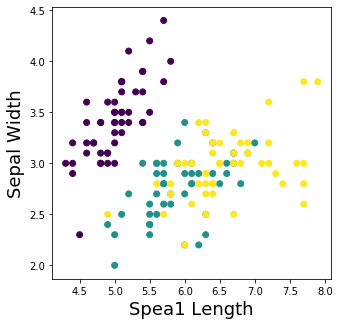

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Defining colors and ploting centroids for all clusters

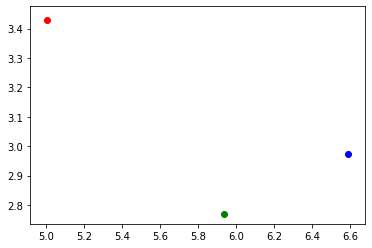

In [8]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

### Showing complete graph

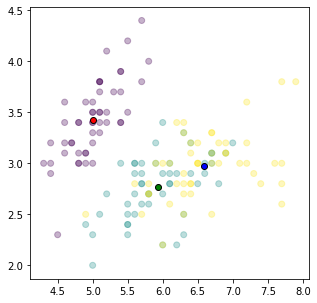

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

# Stage 2: Assignment Stage

### Assignment function : Calculating distance and updating dataFrame

In [13]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [15]:
df = assignment(df, centroids)

In [38]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
5,5.4,3.9,0,0.614833,1.250678,1.506260,0,r
6,4.6,3.4,0,0.406964,1.477090,2.033131,0,r
7,5.0,3.4,0,0.028636,1.128271,1.644147,0,r
8,4.4,2.9,0,0.803754,1.541491,2.189251,0,r
9,4.9,3.1,0,0.344703,1.087288,1.692696,0,r


### Visualisation of clusters with colors:

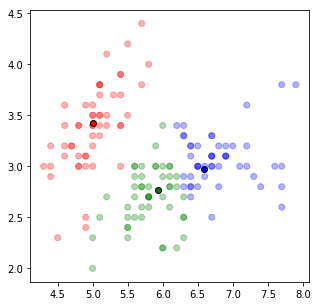

In [39]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

# Stage 3: Update Stage

### Update function : Updating the centroids

In [40]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [41]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

### Visualising the graph with updated centroids

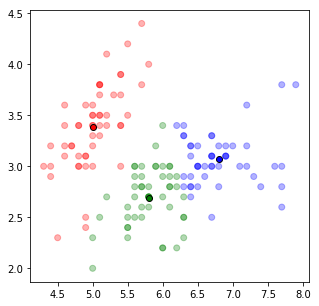

In [42]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

## Repeat assignment stage to to ressign the points with clusters

In [43]:
df = assignment(df, centroids)

### Visualising the updated graph

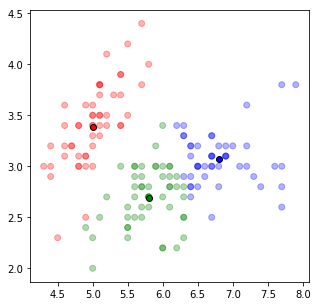

In [44]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

## Continuing until all assigned clusters don't change any more

In [45]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

# Final Result :

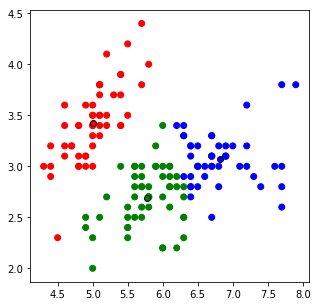

In [46]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()